# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [28]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

C:\Users\Dell\AppData\Local\Temp\ipykernel_15876\2994295117.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [29]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, boundary='fill', mode='same')
filterResponseSobelX = signal.convolve2d(image,sobelX , boundary='fill', mode='same')
filterResponseSobelY = signal.convolve2d(image,sobelY, boundary='fill', mode='same')

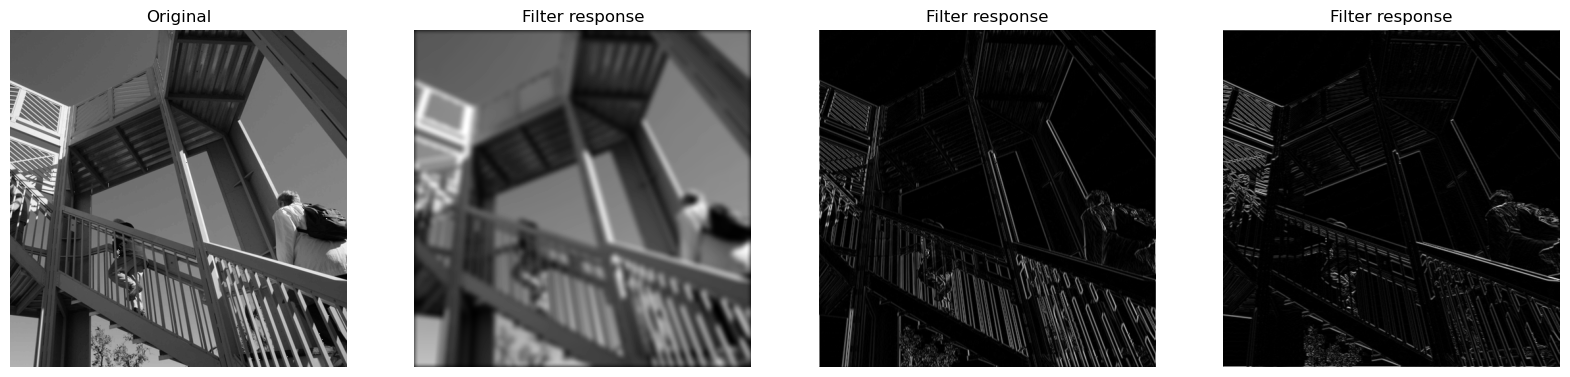

In [30]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?
##### Answer:
- Gaussian filter: This filter applies a blurring effect to the image, which can help to reduce noise and make edges and details appear smoother. The specific blurring effect depends on the size and standard deviation of the Gaussian filter used.
- SobelX filter: This filter is designed to detect horizontal edges in an image by highlighting regions where the pixel values change rapidly along the x-axis.
- SobelY filter: This filter is similar to the SobelX filter, but it is designed to detect vertical edges in an image by highlighting regions where the pixel values change rapidly along the y-axis.

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
##### Answer:
The size of the original image is 512 X 512. It has only one channel because it is a greyscale image. A color image has three channels (red, green, and blue), which together form the full color spectrum of the image.
Question 3: What is the size of the different filters?
##### Answer:
The Gaussian filter has a size of 15 x 15. The Sobel X and Sobel Y filters are of size 3 x 3.

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
##### Answer:
If mode='same' is used in convolution, then the output size of the filtered image will be the same as the input image. The filtered image will be cropped at the edges to match the size of the input image.

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 
##### Answer:
When using the "valid" mode for convolution, only the parts of the image where the filter can completely overlap with are used for the convolution. As a result, the output will be smaller than the input, not the other way around.
The size of output will be smaller than the input size by an amount equal to the size of the filter minus one in each dimension.

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
##### Answer:
Valid convolutions can be a problem for CNNs with many layers because the output size of the convolutional layer becomes smaller and smaller with each layer. This can cause a loss of information because the spatial resolution of the input data is reduced. If the output size becomes too small, it may not be possible to distinguish between different features in the image, and the performance of the model may become poor. 

In [31]:
# Your code for checking sizes of image and filter responses

print(f"Size of the original image {image.shape}")
print(f"Size of the image with gaussian filter response {filterResponseGauss.shape}")
print(f"Size of the image with SobelX filter response {filterResponseSobelX.shape}")
print(f"Size of the image with SobelX filter response {filterResponseSobelY.shape}")

Size of the original image (512, 512)
Size of the image with gaussian filter response (512, 512)
Size of the image with SobelX filter response (512, 512)
Size of the image with SobelX filter response (512, 512)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 
##### Answer:
Color images are represented in 3 channels: red, green, and blue. So, when applying a filter to a color image, we have to consider all three channels, not just one. This is reason that the filters used for a color image are of size 7 x 7 x 3. 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

##### Answer:
The 'Conv2D' layer performs convolution operation on input data using a filter.The filter is slid over the input data, multiplying and summing the results to produce an output feature map. Filter parameters are learned during training to extract useful features for a given task like image classification.<br>
Yes, the operation performed by the 'Conv2D' layer in a convolutional neural network is a standard 2D convolution, similar to the one performed by the function signal.convolve2d that we tested. 
Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.
##### Answer:
When convolving a batch of images, the workload can be distributed across the available processing cores, allowing the GPU to perform the task much faster than a CPU. Therefore, whether we convolve a batch of 1,000 images or 3 images, a GPU will be faster than a CPU due to its parallel computing capability.


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [32]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

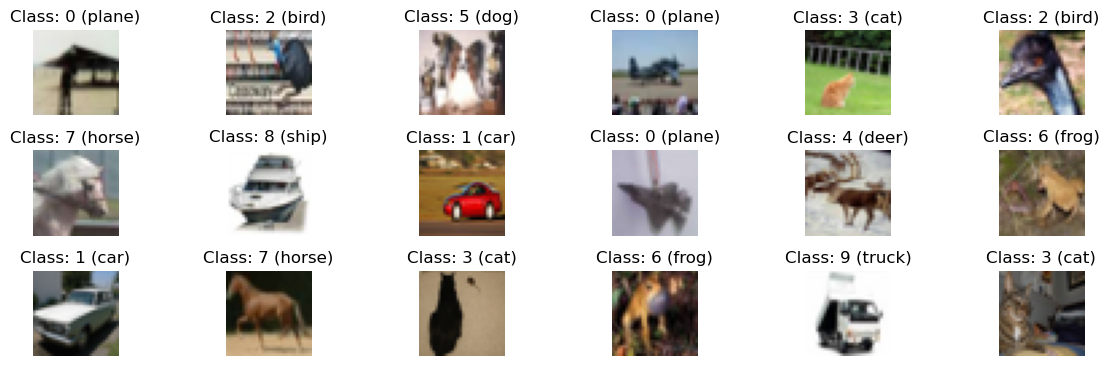

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [34]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25,random_state=22)
# Print the size of training data, validation data and test data
print(f"Size of training data :{Xtrain.shape}")
print(f"Size of labels of training data :{Ytrain.shape}")
print(f"Size of validation data :{Xval.shape}")
print(f"Size of labels for validation data :{Yval.shape}")
print(f"Size of test data :{Xtest.shape}")
print(f"Size of labels for test data :{Ytest.shape}")

Size of training data :(7500, 32, 32, 3)
Size of labels of training data :(7500, 1)
Size of validation data :(2500, 32, 32, 3)
Size of labels for validation data :(2500, 1)
Size of test data :(2000, 32, 32, 3)
Size of labels for test data :(2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [35]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [36]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print(f"Size of Ytrain :{Ytrain.shape}")
print(f"Size of Yval :{Yval.shape}")
print(f"Size of Ytest :{Ytest.shape}")

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain,dtype="int32")
Yval = to_categorical(Yval,dtype="int32")
Ytest = to_categorical(Ytest,dtype="int32")

# Print shapes after converting the labels
print(f"Size of Ytrain :{Ytrain.shape}")
print(f"Size of Yval :{Yval.shape}")
print(f"Size of Ytest :{Ytest.shape}")

Size of Ytrain :(7500, 1)
Size of Yval :(2500, 1)
Size of Ytest :(2000, 1)
Size of Ytrain :(7500, 10)
Size of Yval :(2500, 10)
Size of Ytest :(2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [37]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add( Conv2D(filters=n_filters, kernel_size = (3, 3),activation ='relu', input_shape = input_shape, padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add( Conv2D(filters=2**(i+1)*n_filters,kernel_size = (3, 3),activation ='relu', input_shape = input_shape, padding = "same"))
        model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation = 'relu'))
        if use_dropout is True:
            model.add(Dropout(0.5))
        
    # Add final dense layer
    model.add(Dense(10, activation = 'softmax'))
   
    # Compile model
    model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
                      
    return model

In [38]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [39]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 9s 74ms/step - loss: 1.9213 - accuracy: 0.3064 - val_loss: 1.6285 - val_accuracy: 0.4256
Epoch 2/20
75/75 [==============================] - 3s 34ms/step - loss: 1.5733 - accuracy: 0.4284 - val_loss: 1.5399 - val_accuracy: 0.4420
Epoch 3/20
75/75 [==============================] - 3s 35ms/step - loss: 1.4382 - accuracy: 0.4837 - val_loss: 1.4566 - val_accuracy: 0.4732
Epoch 4/20
75/75 [==============================] - 3s 41ms/step - loss: 1.3789 - accuracy: 0.5024 - val_loss: 1.4698 - val_accuracy: 0.4724
Epoch 5/20
75/75 [==============================] - 3s 35ms/step - loss: 1.2717 - accuracy: 0.5513 - val_loss: 1.5199 - val_accuracy: 0.4676
Epoch 6/20
75/75 [==============================] - 3s 39ms/step - loss: 1.2704 - accuracy: 0.5449 - val_loss: 1.3836 - val_accuracy: 0.5044
Epoch 7/20
75/75 [==============================] - 3s 37ms/step - loss: 1.1741 - accuracy: 0.5749 - val_loss: 1.4422 - val_accuracy: 0.4804
Epoch 8/20
75

In [40]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 23ms/step - loss: 1.8405 - accuracy: 0.4890
Test loss: 1.8405
Test accuracy: 0.4890


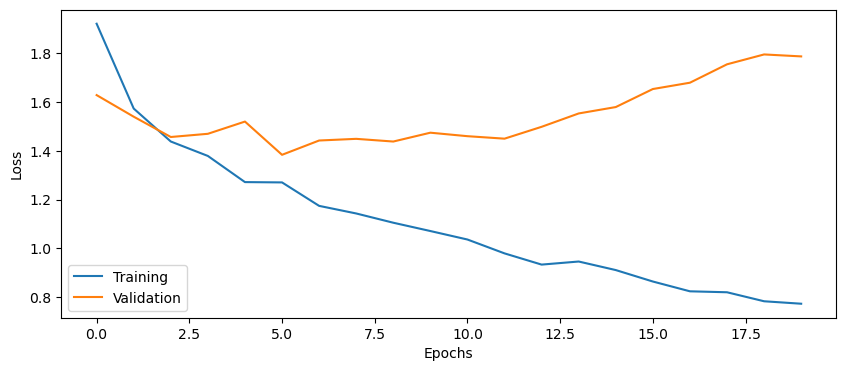

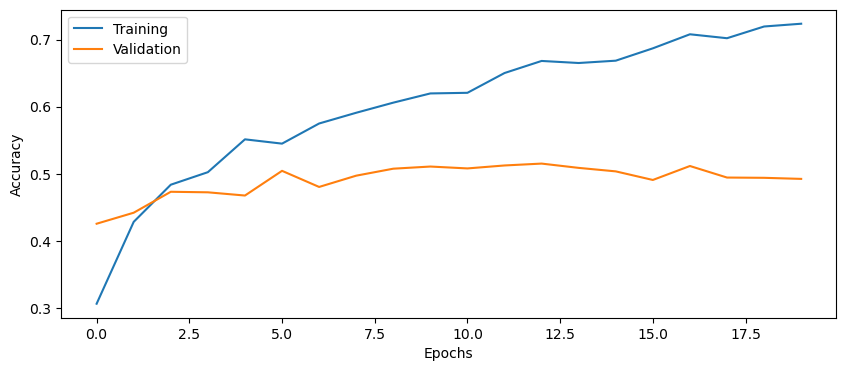

In [41]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?
##### Answer:
Training accuracy is 72.36% and test accuracy is 48.90%. The difference is 23.46%

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
##### Answer:
In CNN, the input data goes through several convolutional layers, which apply filters to the data and produce output feature maps. The number of parameters in these filters can be quite large, which makes training with a large batch size. 

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [43]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 10s 76ms/step - loss: 1.9663 - accuracy: 0.2841 - val_loss: 1.7013 - val_accuracy: 0.3680
Epoch 2/20
75/75 [==============================] - 3s 35ms/step - loss: 1.5637 - accuracy: 0.4329 - val_loss: 1.5571 - val_accuracy: 0.4396
Epoch 3/20
75/75 [==============================] - 3s 37ms/step - loss: 1.4284 - accuracy: 0.4812 - val_loss: 1.5118 - val_accuracy: 0.4612
Epoch 4/20
75/75 [==============================] - 3s 40ms/step - loss: 1.3741 - accuracy: 0.5001 - val_loss: 1.4519 - val_accuracy: 0.4716
Epoch 5/20
75/75 [==============================] - 3s 38ms/step - loss: 1.2785 - accuracy: 0.5363 - val_loss: 1.4655 - val_accuracy: 0.4736
Epoch 6/20
75/75 [==============================] - 3s 36ms/step - loss: 1.2505 - accuracy: 0.5408 - val_loss: 1.5603 - val_accuracy: 0.4712
Epoch 7/20
75/75 [==============================] - 2s 32ms/step - loss: 1.1663 - accuracy: 0.5684 - val_loss: 1.4924 - val_accuracy: 0.4712
Epoch 8/20
7

In [44]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 21ms/step - loss: 2.5789 - accuracy: 0.4510
Test loss: 2.5789
Test accuracy: 0.4510


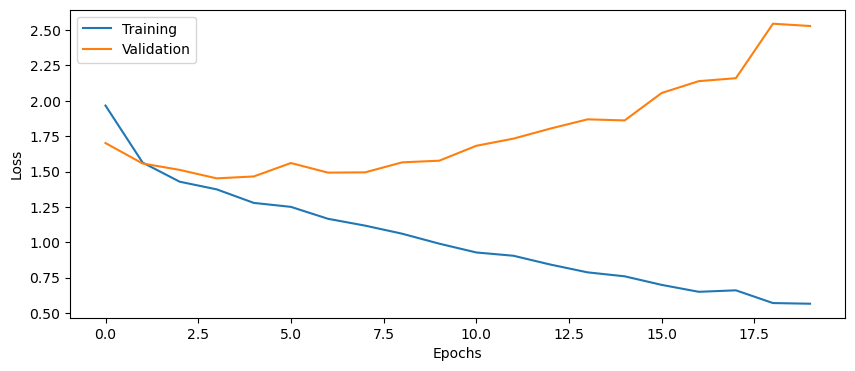

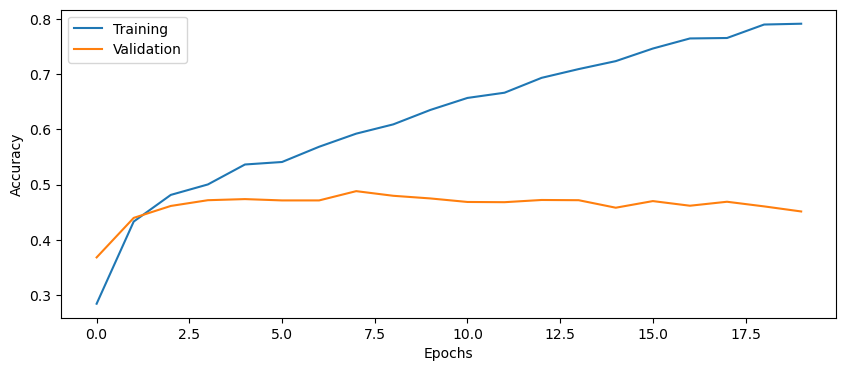

In [45]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [46]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 13s 100ms/step - loss: 2.2659 - accuracy: 0.1291 - val_loss: 2.0710 - val_accuracy: 0.2404
Epoch 2/20
75/75 [==============================] - 4s 56ms/step - loss: 1.9752 - accuracy: 0.2376 - val_loss: 1.8814 - val_accuracy: 0.2748
Epoch 3/20
75/75 [==============================] - 5s 68ms/step - loss: 1.8416 - accuracy: 0.2868 - val_loss: 1.7880 - val_accuracy: 0.3056
Epoch 4/20
75/75 [==============================] - 4s 59ms/step - loss: 1.7586 - accuracy: 0.3271 - val_loss: 1.7147 - val_accuracy: 0.3544
Epoch 5/20
75/75 [==============================] - 4s 59ms/step - loss: 1.6730 - accuracy: 0.3641 - val_loss: 1.6871 - val_accuracy: 0.3552
Epoch 6/20
75/75 [==============================] - 5s 65ms/step - loss: 1.6287 - accuracy: 0.3844 - val_loss: 1.6093 - val_accuracy: 0.3900
Epoch 7/20
75/75 [==============================] - 5s 67ms/step - loss: 1.5767 - accuracy: 0.4001 - val_loss: 1.6250 - val_accuracy: 0.3996
Epoch 8/20


In [48]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest,Ytest,verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 3s 22ms/step - loss: 1.6751 - accuracy: 0.4240
Test loss: 1.6751
Test accuracy: 0.4240


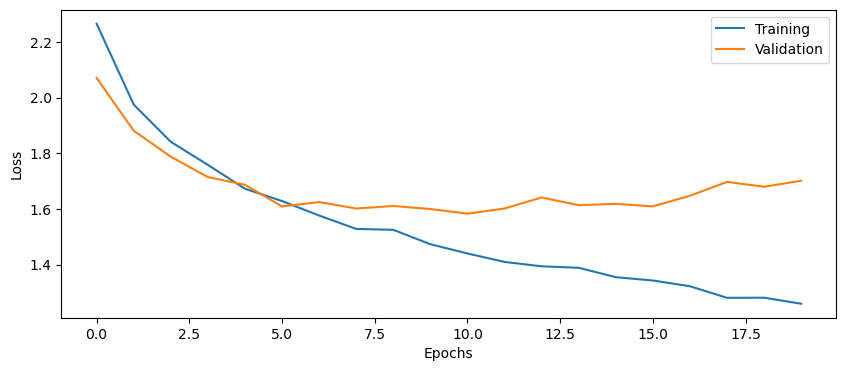

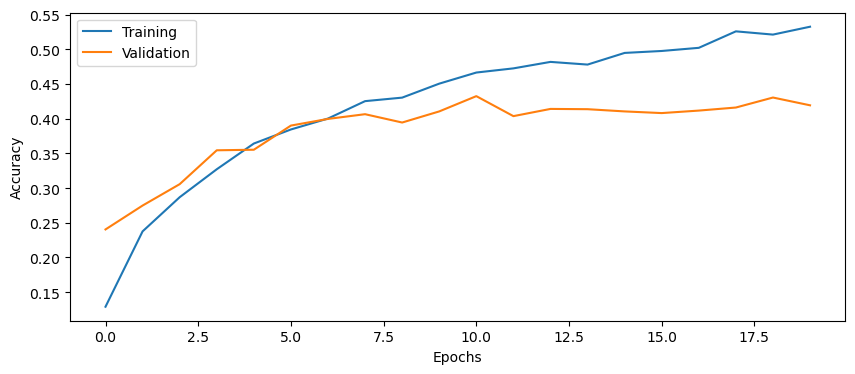

In [49]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
##### Answer: 
Network has 123,600 trainable parameters. conv2d_11 has most number of parameters. i.e 73856 

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
##### Answer:
The input to a Conv2D layer is tensor that has dimendions - batch_size, heigh of images, width of images, channels

The output of a Conv2D layer is another 4D tensor with a new shape: (batch_size, new_height, new_width, filters), where:

- batch_size : the same as the input
- new_height : the height of the output feature maps
- new_width : the width of the output feature maps
- filters : the number of filters in the Conv2D layer

Input dimensions : (100 , 32 , 32, 3) <br>
Output dimensions : (None, 32, 32, 16)


Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/
##### Answer:
Yes, the batch size is always the first dimension of each 4D tensor.

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
##### Answer:
The number of channels in the output will also be 128, because each filter produces a single channel in the output, and the number of filters in the convolutional layer does not affect the number of channels in the input or output.

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
##### Answer:
The number of parameters in a Conv2D layer is calculated as (shape of filter x number of filters in the previous layer (depth) + 1) x (number of filters). This formula takes into account the number of filter coefficients, the number of filters, and the number of biases.

Question 17: How does MaxPooling help in reducing the number of parameters to train?
##### Answer:
MaxPooling helps in reducing the number of parameters to train by downsampling the output feature maps from the Conv2D layer. This operation selects the maximum value from a region of the feature map, and this reduces the size of the feature map while retaining the most important information.

In [50]:
# Print network architecture

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)        

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?
##### Answer:
Accuracy is reduced to 37.10% from 42.40%

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?
##### Answer:
In addition to dropout, we can use other types of regularization techniques like L1 regularization and L2 regularization. L1 regularization adds a penalty term to the loss function proportional to the absolute value of the weights which makes the model to use fewer features in the input and can help with feature selection L2 regularization adds a penalty term to the loss function proportional to the squared value of the weights which makes the model to use smaller weights and can help prevent overfitting.<br>
To add L2 regularization for the convolutional layers in Keras, we can use the kernel_regularizer argument when defining the layers.


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [51]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 12s 105ms/step - loss: 2.2777 - accuracy: 0.1297 - val_loss: 2.1172 - val_accuracy: 0.1700
Epoch 2/20
75/75 [==============================] - 5s 60ms/step - loss: 2.1303 - accuracy: 0.1931 - val_loss: 2.0162 - val_accuracy: 0.2408
Epoch 3/20
75/75 [==============================] - 5s 62ms/step - loss: 1.9888 - accuracy: 0.2073 - val_loss: 1.8677 - val_accuracy: 0.2916
Epoch 4/20
75/75 [==============================] - 5s 61ms/step - loss: 1.9095 - accuracy: 0.2488 - val_loss: 1.7800 - val_accuracy: 0.3308
Epoch 5/20
75/75 [==============================] - 4s 57ms/step - loss: 1.8397 - accuracy: 0.2729 - val_loss: 1.7799 - val_accuracy: 0.3204
Epoch 6/20
75/75 [==============================] - 5s 61ms/step - loss: 1.8429 - accuracy: 0.2779 - val_loss: 1.7305 - val_accuracy: 0.3220
Epoch 7/20
75/75 [==============================] - 5s 67ms/step - loss: 1.8201 - accuracy: 0.2815 - val_loss: 1.7130 - val_accuracy: 0.3416
Epoch 8/20


In [52]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest,verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 3s 28ms/step - loss: 1.6108 - accuracy: 0.3710
Test loss: 1.6108
Test accuracy: 0.3710


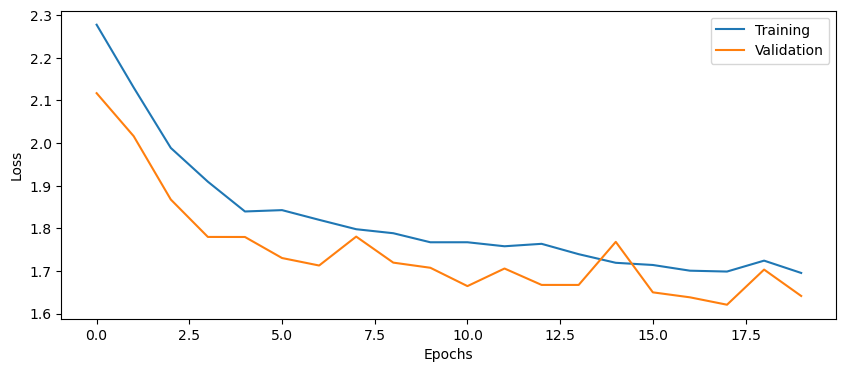

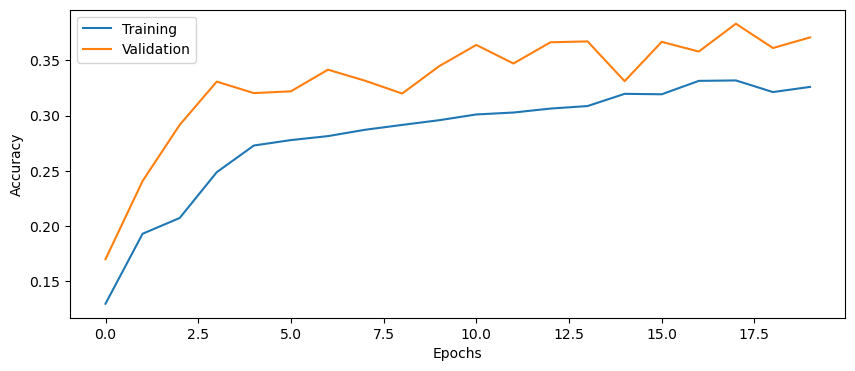

In [53]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?
##### Answer:
The highest test accuracy obtained is 49.80% with the following configuration
- convolutional layers : 2
- number of filters per layer : 12
- number of intermediate dense layers : 2 
- number of nodes in the intermediate dense layers : 20 
- batch size : 100
- learning rate : 0.01 
- number of epochs: 20

## Your best config

In [73]:
# Setup some training parameters
epochs=20
# Build model
model5 = build_CNN(input_shape, n_conv_layers=2, n_filters=12, n_dense_layers=2, n_nodes=20, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 9s 78ms/step - loss: 1.9625 - accuracy: 0.2655 - val_loss: 1.6873 - val_accuracy: 0.3612
Epoch 2/20
75/75 [==============================] - 3s 37ms/step - loss: 1.5861 - accuracy: 0.4141 - val_loss: 1.4952 - val_accuracy: 0.4476
Epoch 3/20
75/75 [==============================] - 3s 40ms/step - loss: 1.4308 - accuracy: 0.4819 - val_loss: 1.4676 - val_accuracy: 0.4688
Epoch 4/20
75/75 [==============================] - 3s 41ms/step - loss: 1.3501 - accuracy: 0.5057 - val_loss: 1.5393 - val_accuracy: 0.4396
Epoch 5/20
75/75 [==============================] - 3s 36ms/step - loss: 1.2962 - accuracy: 0.5229 - val_loss: 1.4245 - val_accuracy: 0.4844
Epoch 6/20
75/75 [==============================] - 3s 39ms/step - loss: 1.1977 - accuracy: 0.5703 - val_loss: 1.3872 - val_accuracy: 0.4940
Epoch 7/20
75/75 [==============================] - 3s 36ms/step - loss: 1.1801 - accuracy: 0.5713 - val_loss: 1.4276 - val_accuracy: 0.4984
Epoch 8/20
75

In [74]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 3s 21ms/step - loss: 1.7227 - accuracy: 0.4980
Test loss: 1.7227
Test accuracy: 0.4980


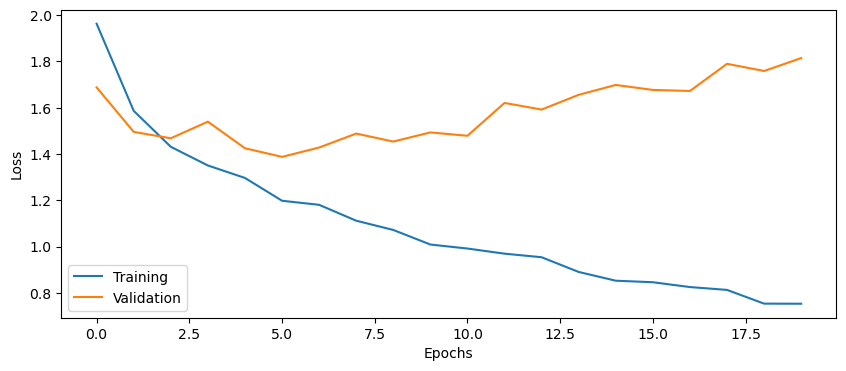

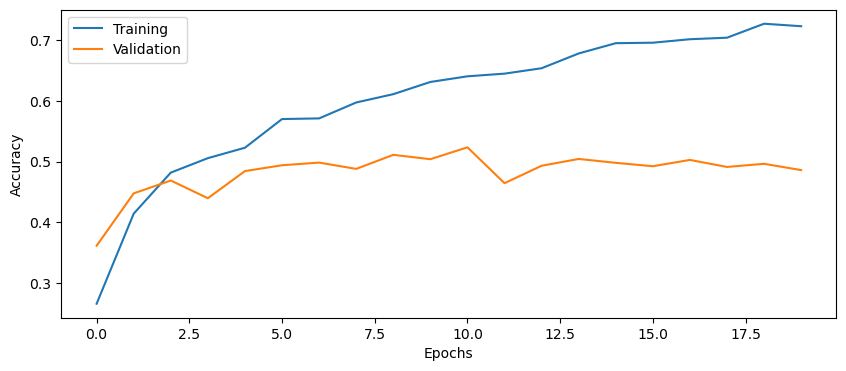

In [75]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.
##### Answer:
The test accuracy for rotated test images is 23.05% which is far lesser than the accuracy of test images without rotation. The reason for the difference in accuracy is the model was trained with non-rotated images and tested on rotated images.

In [76]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

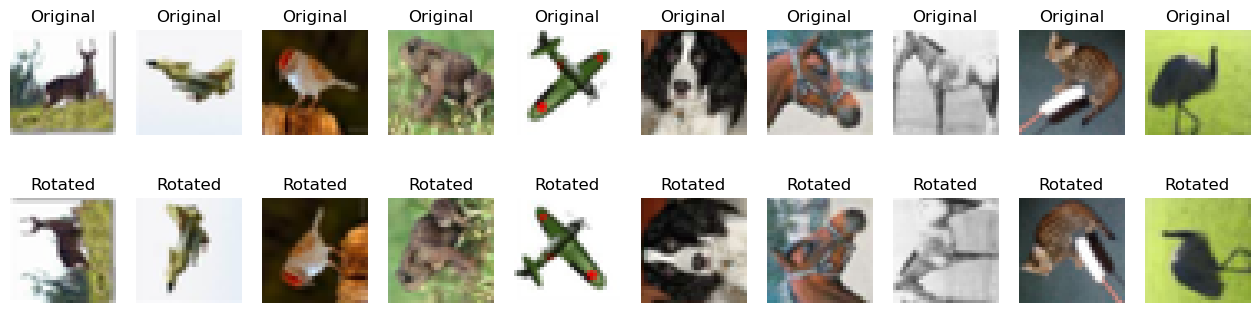

In [77]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [78]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 24ms/step - loss: 3.9957 - accuracy: 0.2305
Test loss: 3.9957
Test accuracy: 0.2305


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [83]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [84]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain,test_size=0.20, random_state=22,shuffle = True)

# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True,vertical_flip=True, validation_split=0.2)


# Setup a flow for training data, assume that we can fit all images into CPU memory
train_data = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)


# Setup a flow for validation data, assume that we can fit all images into CPU memory
valid_data = datagen.flow(Xval, Yval, batch_size=batch_size)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?
##### Answer:
If we cannot fit all training images in CPU memory, we can use the flow_from_directory method of ImageDataGenerator instead of flow method. This method reads the images from disk in batches and applies data augmentation on the fly.

The disadvantage of using this method is that reading images from disk can be slower than loading images into memory which can result in slower training durations.

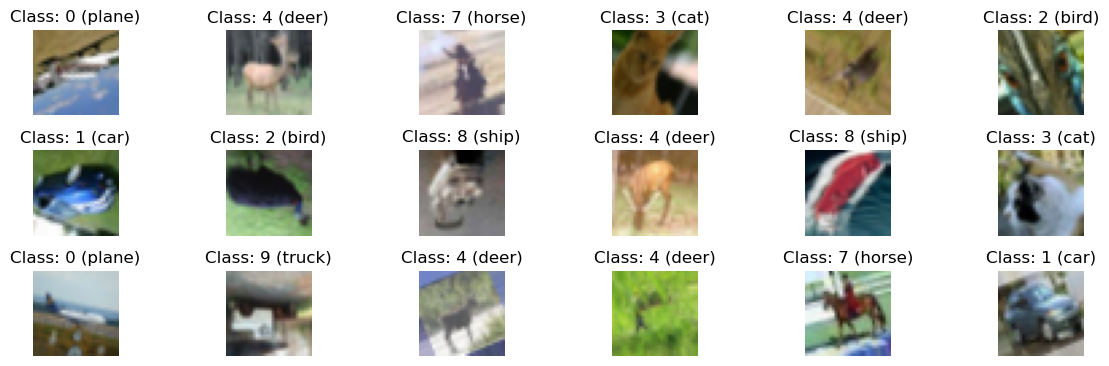

In [85]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?
##### Answer:
Training accuracy is increasing faster compared to without augmentation. This is because data augmentation creates additional training data by applying transformation(rotation) to the existing samples, which helps the model to generalize better and learn more robust features.

Question 24: What other types of image augmentation can be applied, compared to what we use here?
##### Answer: 
Other types of image augmentation are 
- Flipping: mirroring the image along the vertical or horizontal axis.
- Scaling:  zooming in or out of the image by a small amount.
- Cropping: randomly crops a section of the image and resize it back to the original size.
- Color Jittering: changing the color intensity, brightness, contrast, and saturation of the image.
- Noise: Adding random noise to the image 


In [95]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:4]

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=2, n_filters=12,n_dense_layers=2, n_nodes=20, use_dropout=False, learning_rate=0.01)

train_datagen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)
valid_datagen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)
validation_split=0.2

    
# Train the model using on the fly augmentation
history6 = model6.fit_generator(train_datagen,steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size, epochs=epochs, validation_data=valid_datagen,validation_steps=len(Xtrain)*validation_split/batch_size)
                                
                                

C:\Users\Dell\AppData\Local\Temp\ipykernel_15876\3141439534.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history6 = model6.fit_generator(train_datagen,steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size, epochs=epochs, validation_data=valid_datagen,validation_steps=len(Xtrain)*validation_split/batch_size)


Epoch 1/200
64/64 [==============================] - 18s 218ms/step - loss: 2.1098 - accuracy: 0.2028 - val_loss: 1.9443 - val_accuracy: 0.2488
Epoch 2/200
64/64 [==============================] - 11s 165ms/step - loss: 1.9191 - accuracy: 0.2697 - val_loss: 1.8553 - val_accuracy: 0.2969
Epoch 3/200
64/64 [==============================] - 11s 172ms/step - loss: 1.8191 - accuracy: 0.3092 - val_loss: 1.7538 - val_accuracy: 0.2950
Epoch 4/200
64/64 [==============================] - 11s 175ms/step - loss: 1.7975 - accuracy: 0.3206 - val_loss: 1.7230 - val_accuracy: 0.3650
Epoch 5/200
64/64 [==============================] - 11s 176ms/step - loss: 1.7159 - accuracy: 0.3500 - val_loss: 1.6779 - val_accuracy: 0.3762
Epoch 6/200
64/64 [==============================] - 11s 177ms/step - loss: 1.6728 - accuracy: 0.3762 - val_loss: 1.7054 - val_accuracy: 0.3775
Epoch 7/200
64/64 [==============================] - 11s 178ms/step - loss: 1.6577 - accuracy: 0.3789 - val_loss: 1.5960 - val_accuracy:

In [96]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.4695
Test accuracy: 0.4935
Test loss: 2.4050
Test accuracy: 0.2645


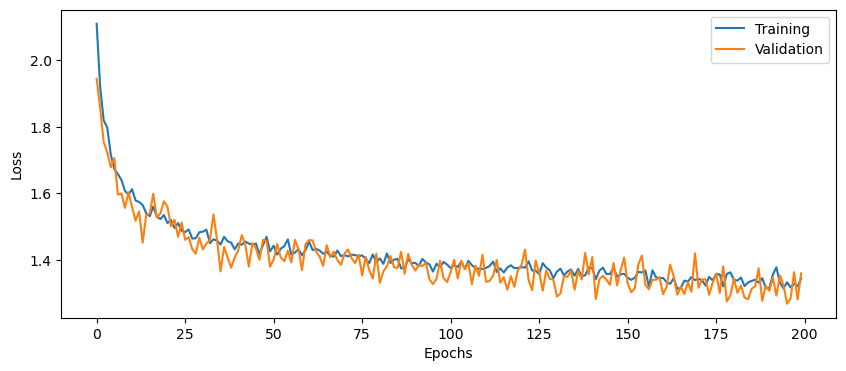

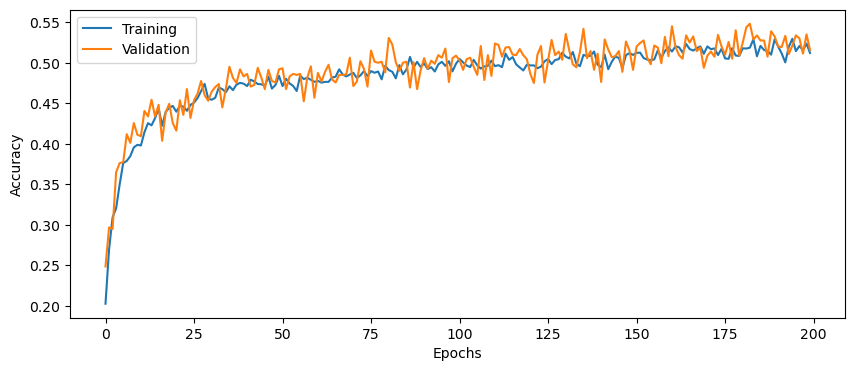

In [97]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [98]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 2s 21ms/step


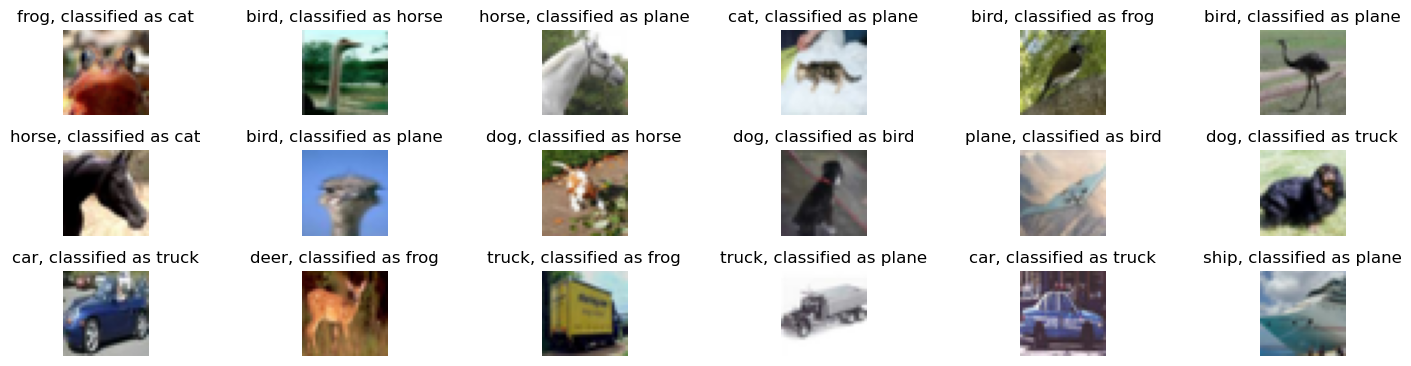

In [99]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?
##### Answer:
No, we cannot apply this CNN to images of other size directly because the architecture of the CNN is designed to train the model with images of size 32 X 32. The size of the filters in a convolutional layer is choosen to match the size of input image. So changing input image size require change in the overall architecture of the CNN. 

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?
##### Answer:
Yes, it is possible. Resize (compress or extend) an image to a fixed size before passing it through a pre-trained CNN. 

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have?
##### Answer:
ResNet50 has 50 convolutional layers.

Question 28: How many trainable parameters does the ResNet50 network have? 
##### Answer:
It has 25,636,712 trainable parameters.

Question 29: What is the size of the images that ResNet50 expects as input?
##### Answer:
224 X 224

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.
##### Answer:

The number of trainable parameters in deep neural networks can be very large (millions) number of parameters, depending on the size and complexity of the network. Calculating the second derivative of the loss function with respect to all of these parameters would need a huge amount of memory and computational resources. 

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [100]:
from keras.applications import ResNet50
model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 [==============================] - 12s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

In [1]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Define the target size for the ResNet50 model
target_size = (224, 224)

# Load and preprocess the image
images = ['cat.jpg','car.jpg','elephant.jpg','horse.jpg','aeroplane.jpg']

for img_name in images:
    img_path = img_name
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    preds = model.predict(img)
    decoded_preds = decode_predictions(preds, top=1)[0]
    label = decoded_preds[0][1]
    print('Predicted label: {}'.format(label))


1/1 [==============================] - 6s 6s/step
Predicted label: Egyptian_cat
1/1 [==============================] - 0s 445ms/step
Predicted label: minivan
1/1 [==============================] - 0s 366ms/step
Predicted label: African_elephant
1/1 [==============================] - 0s 337ms/step
Predicted label: horse_cart
1/1 [==============================] - 0s 331ms/step
Predicted label: airliner
